### Carregando dados:

In [11]:
import pickle

# Carregando dados pelo pickle:

with open('features_tratadas/critic_temp.pkl', 'rb') as f:
    crit_temp_array = pickle.load(f)
with open('features_tratadas/thermal_cond.pkl', 'rb') as f:
    thermal_cond_array = pickle.load(f)

### Separando em train - test:

In [12]:
from sklearn.model_selection import train_test_split

crit_temp_array_train, crit_temp_array_test = train_test_split(crit_temp_array, test_size = 0.2, random_state=42)
thermal_cond_array_train, thermal_cond_array_test = train_test_split(thermal_cond_array, test_size=0.2, random_state=42)

### Criando modelo:

In [13]:
from sklearn.linear_model import LinearRegression
import numpy as np

modelo = LinearRegression()

thermal_cond_array_train = thermal_cond_array_train.reshape(-1, 1)

simples_reglin = modelo.fit(thermal_cond_array_train, crit_temp_array_train)


# Mostrando coeficientes da reta:
a = modelo.coef_[0]
b = modelo.intercept_

print(f"Equação da reta: y = {a:.4f}x + {b:.4f}")

# Mostrando Coeficiente de Pearson:
y_pred = modelo.predict(thermal_cond_array_train)
r = np.corrcoef(crit_temp_array_train, y_pred)[0, 1]

print(f"Coeficiente de correlação linear (r): {r:.4f}")

Equação da reta: y = 0.0359x + 1.5749
Coeficiente de correlação linear (r): 0.7525


### Plotando gráfico:

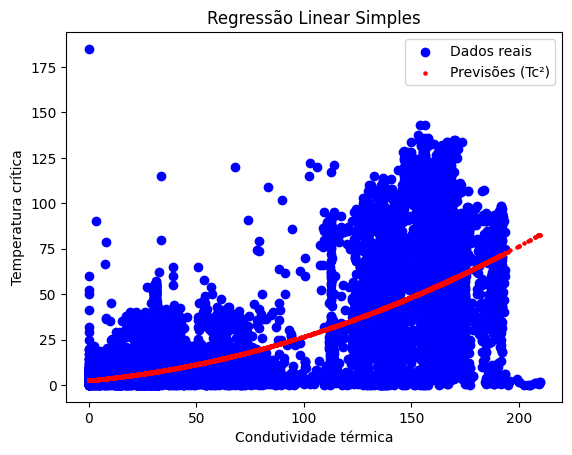

In [14]:
import matplotlib.pyplot as plt

# Previsão dos valores:
y_pred_train = modelo.predict(thermal_cond_array_train)
y_pred_train = np.where(y_pred_train < 0, 0, y_pred_train) # Zera valores negativos previstos

# Reverte a transformação (raiz quadrada) → escala real (Kelvin):
y_real_train = crit_temp_array_train**2
y_pred_train = y_pred_train**2

# Plotando os gráficos:
plt.scatter(thermal_cond_array_train, y_real_train, color='blue', label='Dados reais')
plt.scatter(thermal_cond_array_train, y_pred_train, s=5, color='red', label='Previsões (Tc²)')
plt.xlabel('Condutividade térmica')
plt.ylabel('Temperatura crítica')
plt.title('Regressão Linear Simples')
plt.legend()
plt.show()

### Analisando Acurácia do modelo:

Equação da reta: y = 0.0359x + 1.5749
Coeficiente de correlação linear (r): 0.7546


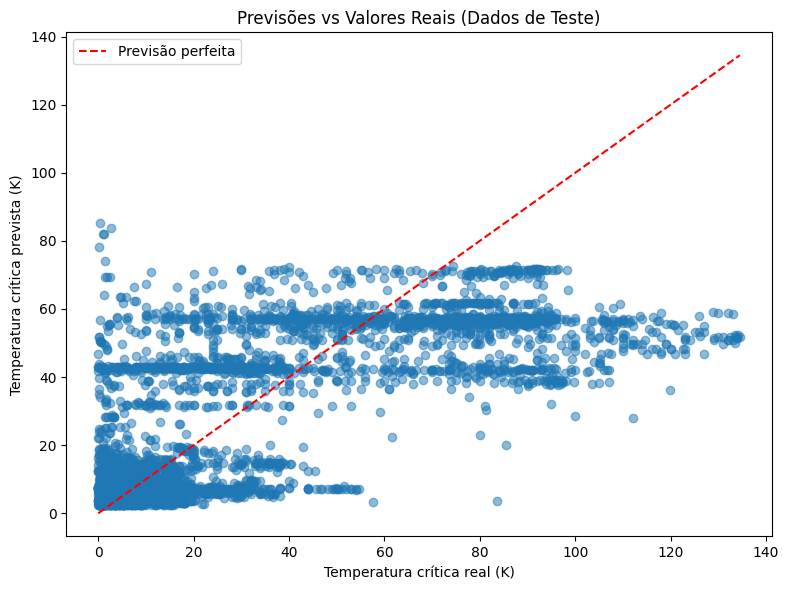

In [15]:
import matplotlib.pyplot as plt

# Previsão dos valores:
thermal_cond_array_test = thermal_cond_array_test.reshape(-1, 1)
y_pred_test = modelo.predict(thermal_cond_array_test)

# Mostrando coeficientes da reta:
a = modelo.coef_[0]
b = modelo.intercept_

print(f"Equação da reta: y = {a:.4f}x + {b:.4f}")

# Mostrando Coeficiente de Pearson:
r = np.corrcoef(crit_temp_array_test, y_pred_test)[0, 1]

print(f"Coeficiente de correlação linear (r): {r:.4f}")

# Reverte a transformação (raiz quadrada) → escala real (Kelvin):
y_real_test = crit_temp_array_test ** 2
y_pred_test = y_pred_test ** 2

# Plotando gráfico de comparação:
plt.figure(figsize=(8, 6))
plt.scatter(y_real_test, y_pred_test, alpha=0.5)
plt.plot([y_real_test.min(), y_real_test.max()],
         [y_real_test.min(), y_real_test.max()],
         color='red', linestyle='--', label='Previsão perfeita')

plt.xlabel("Temperatura crítica real (K)")
plt.ylabel("Temperatura crítica prevista (K)")
plt.title("Previsões vs Valores Reais (Dados de Teste)")
plt.legend()
plt.tight_layout()
plt.show()